In [ ]:
################################################################################################
# File: prob4.py
# Author: Joshua D. Rego
# Description: Convolution as a Matrix Multiplication
################################################################################################

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import time
from scipy import signal

In [4]:
################################################################################################

########## Section 4.a - Generate convolution as a Matrix ######################################

In [32]:
# Define kernel h
h = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
m_h, n_h = h.shape

In [33]:
# Define Input Image
I = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m_I, n_I = I.shape

In [36]:
def kern2mat(h, I):
    # If debugging matrix generation, set to 1
    debug = 0
    
    # Determine size for output image
    m_I, n_I = I.shape
    m_h, n_h = h.shape
    m_Y, n_Y = m_I+m_h-1, n_I+n_h-1 
    
    # Initialize list for toeplitz matrices
    t = [np.zeros((n_Y, n_I))] * m_h
    l_t = len(t)
    m_t, n_t = t[0].shape
    
    # Initialize Matrix H size
    H = np.zeros((m_Y*n_Y, n_I*m_I))
    m_H, n_H = H.shape
    # Loop for first toeplitz (0) and doubly blocked toeplitz (1)
    for toe in range(0, 2):
        # Loop rows
        for i in range(0, m_t):
            # Loop columns
            for j in range(0, i+1):
                
                # Determine index in kernel row
                ind = i-j
                
                # Limit index < kernel columns & column < toeplitz columns
                if ind < n_h and j < n_t:
                    
                    # Create first Toeplitz matrices if toe == 0
                    if toe == 0:
                        
                        # Assign value from each kernel row to each toeplitz matrix
                        for k in range(len(t)):
                            t[k][i,j] = h[k,ind]
                        
                    # Create Doubly blocked Toeplitz matrix H if toe == 1, 
                    else:
                        # Start and End indexes for H
                        i_start = i * m_t; i_end = i * m_t + m_t
                        j_start = j * n_t; j_end = j * n_t + n_t
                        
                        # Limit column sections < columns of H
                        if (j_end-1) < n_H:
                            
                            # Assign values for Doubly blocked Toeplitz
                            H[i_start : i_end, j_start : j_end] = t[ind]
                            
                            if debug == 1:
                                print(i,j, "[", i_start, ":", i_end, ",", j_start, ":", j_end, "]")
    return H      

In [37]:
# Generate Convolution as Matrix Multiplication matrix H
H = kern2mat(h, I)
print(H)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [-1.  0.  1. -1.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  0.]
 [-1.  0.  1. -1.  0.  1. -1.  0.  1.]
 [ 0. -1.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  1. -1.  0.  1.]
 [ 0.  0.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [45]:
################################################################################################

########## Section 4.b - Write function conv2dmatrix to perform matrix multiplication ##########

In [39]:
# Define function for matrix multiplication
def conv2dmatrix(I, H):
   
    # Dimensions of input image
    m_I, n_I = I.shape
    # Reshape image to vector
    I_vec = np.reshape(I, m_I*n_I)
    # Measure start time
    t_start = time.time()
    # Perform multiplication
    Y = np.matmul(H, I_vec)
    # Measure time taken for multiplication
    t_elapse = time.time() - t_start
    
    # Redefine kernel for built-in function
    h = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    # Use builtin function for 2D Convolution
    Y_GT = signal.convolve2d(I, h).astype('float64')
    # Find error between Ground Truth and Matrix multiplication
    error = np.sum(cv2.absdiff(np.reshape(Y_GT, (Y_GT.shape[0]*Y_GT.shape[1])), Y))
    
    return Y, t_elapse, error

In [40]:
# Perform Matrix Multiplication for 3x3 image
Y, t_elapse, error = conv2dmatrix(I, H)
Y = np.reshape(Y, (m_I+m_h-1,n_I+n_h-1))

print('Y Shape:', Y.shape)
print(Y)
print('Time:', t_elapse * 1000, 'msecs')
print('Error:', error)

Y Shape: (5, 5)
[[  1.   2.   2.  -2.  -3.]
 [  5.   7.   4.  -7.  -9.]
 [ 12.  15.   6. -15. -18.]
 [ 11.  13.   4. -13. -15.]
 [  7.   8.   2.  -8.  -9.]]
Time: 0.06103515625 msecs
Error: 0.0


In [41]:
################################################################################################

########## Section 4.c.a - Generalize code for elephant image (Downsampling) ###################

In [46]:
# Read in Elephant image
img = cv2.imread('./elephant.jpeg', 0)
m_img, n_img = img.shape

# Determine downsampled dimensions
scale = 10
height,w = int(m_img * scale / 100), int(n_img * scale / 100)
dim_down = (w,height)
print('Original Size:', img.shape)

# Downsample image
img_down = cv2.resize(img, dim_down)
m_down, n_down = img_down.shape
print('Downsampled Size:', img_down.shape)

Original Size: (1000, 1500)
Downsampled Size: (100, 150)


In [47]:
# Generate H for downsampled elephant image
H_down = kern2mat(h, img_down)

# Perform Matrix Multiplication for 3x3 image
Y_down, t_elapse, error = conv2dmatrix(img_down, H_down)
# Reshape to display
Y_down = np.reshape(Y_down, (m_down+m_h-1, n_down+n_h-1))

print('Y Shape:', Y.shape)
print('Time:', t_elapse * 1000, 'msecs')
print('Error:', error)

Y Shape: (5, 5)
Time: 306.60200119018555 msecs
Error: 0.0


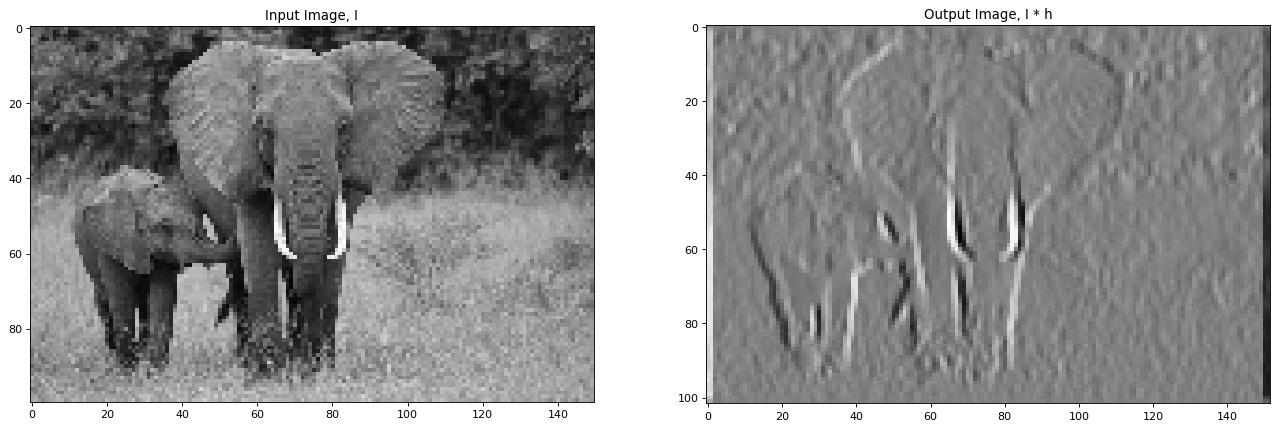

(102, 152)


In [48]:
# Display downsampled images
plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(img_down, 'gray')
plt.title('Input Image, I')
plt.subplot(1,2,2)
plt.imshow(Y_down, 'gray')
plt.title('Output Image, I * h')
plt.show()
print(Y_down.shape)

In [49]:
################################################################################################

########## Section 4.c.b - Generalize code for elephant image (Subsection Operations) ##########

In [50]:
# Determine number of subsections for rows and columns
f = 5
# Image subsection size
m_img_sub = m_img//f
n_img_sub = n_img//f

# Create list for image subsections
img_list = []

# Store each subsection as a separate element in list
for i in range(f):
    for j in range(f):
        i_idx = m_img_sub*i
        j_idx = n_img_sub*j
        img_list.append(img[i_idx:i_idx + m_img_sub, j_idx:j_idx + n_img_sub])
if debug == 1:        
    print(img_list[5].shape)

(200, 300)


In [51]:
# Generate Matrix H for image subsection size
H = kern2mat(h, img_list[0])
print(H, 'Shape =', H.shape)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]] Shape = (61004, 60000)


In [29]:
# Create list for output subsections
Y_list = []

# Store each subsection as a separate element in list
for section in range (0,len(img_list)):
    print('Performing Matrix Multiplication on Section:', section+1, '/', len(img_list))
    
    # Find output of matrix multiplication on image subsection
    Y, t_elapse, error = conv2dmatrix(img_list[section], H)
    # Append output list with current subsection result
    Y_list.append(Y)
    
    #Print results for current output subsection
    print('Y Shape:', Y.shape)
    print('Time:', t_elapse * 1000, 'msecs')
    print('Error:', error)
    print('')

Performing Matrix Multiplication on Section: 1 / 25
Y Shape: (61004,)
Time: 14085.532188415527 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 2 / 25
Y Shape: (61004,)
Time: 17862.091064453125 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 3 / 25
Y Shape: (61004,)
Time: 17571.58899307251 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 4 / 25
Y Shape: (61004,)
Time: 18726.95016860962 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 5 / 25
Y Shape: (61004,)
Time: 18867.19012260437 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 6 / 25
Y Shape: (61004,)
Time: 18774.187088012695 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 7 / 25
Y Shape: (61004,)
Time: 18688.549041748047 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 8 / 25
Y Shape: (61004,)
Time: 20375.2281665802 msecs
Error: 0.0

Performing Matrix Multiplication on Section: 9 / 25
Y Shape: (61004,)
Time: 23062.7338886261 msecs
Er

In [52]:
# Size for full resolution output image
m_Y,n_Y = (m_img+m_h-1), (n_img+n_h-1)
# Size for subsection output image
m_y_sub,n_y_sub = (m_img_sub+m_h-1), (n_img_sub+n_h-1)

# Reshape each output subsection vector to display dimensions
for section in range(0,len(Y_list)):
    Y_list[section] = np.reshape(Y_list[section], (m_y_sub,n_y_sub))

# Initialize full resolution output image
out = np.zeros((m_Y,n_Y))

# Combine each subsection into full resolution output image
for row in range(0,f):
    for col in range(0,f):
        # Starting row index - Subtracting 2*row allows for extra rows to merge
        row_idx = row * m_y_sub - 2*row;
        # Starting column index - Subtracting 2*col allows for extra columns to merge
        col_idx = col * n_y_sub - 2*col
        # Index of image in subsections list
        y_idx = f * row + col
        
        # Add subsection to Full Resolution Output Image
        out[row_idx:row_idx + m_y_sub, col_idx:col_idx + n_y_sub] += Y_list[y_idx]

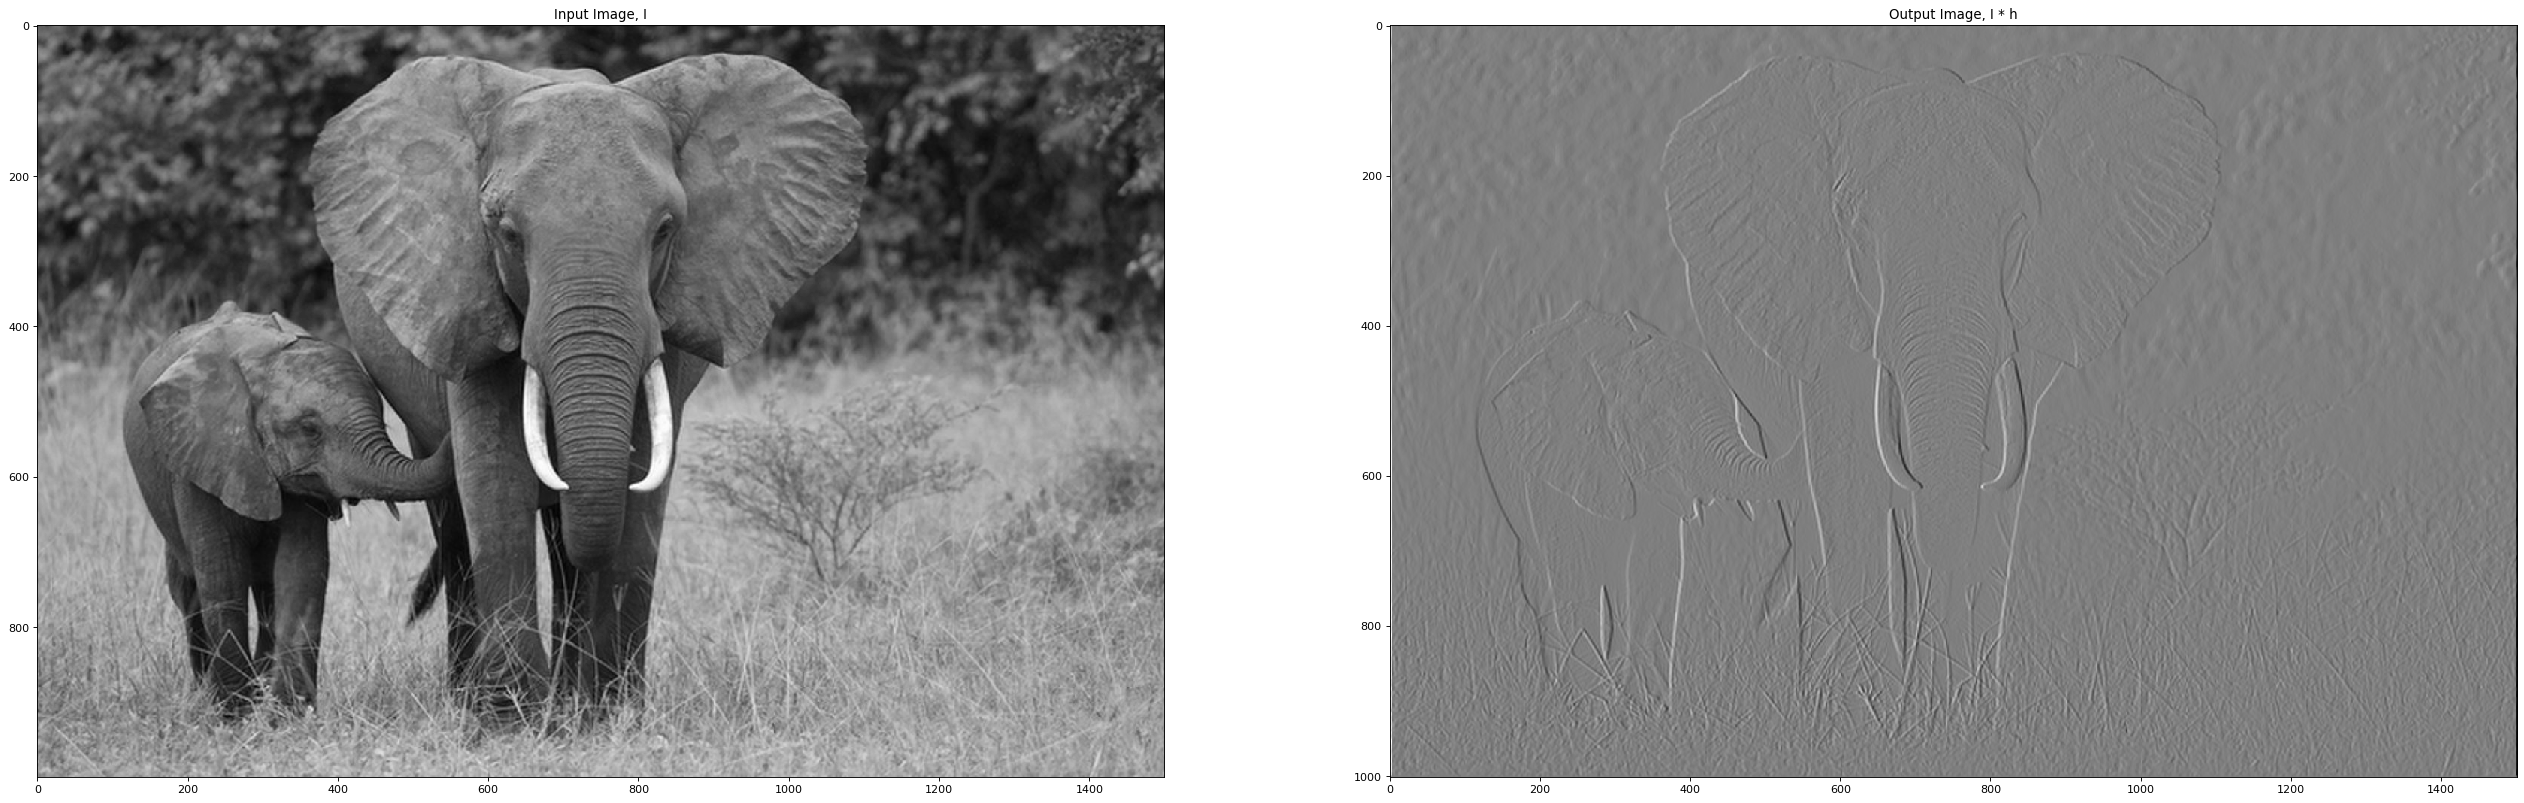

(1002, 1502)


In [53]:
# Plot Full Resolution Output Image
fig=plt.figure(figsize=(40, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Input Image, I')
plt.subplot(1,2,2)
plt.imshow(out, 'gray')
plt.title('Output Image, I * h')
plt.show()
print(out.shape)

In [54]:
cv2.imwrite('./output_images/elephant_conv.png', out)

True